## Taneth Germishuys - Economentrics 1 -PS 1

# Question 2

## Part D

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Step 1: Simulate x and epsilon
np.random.seed(29)  # For reproducibility
n_samples = 10000
x = np.random.randn(n_samples)
epsilon = np.random.randn(n_samples)

# Step 2: Compute y = f(x) + x * epsilon
def f(x):
    return np.where(x < 0, 0, x)

y = f(x) + x * epsilon

# Step 3: Calculate E(y|x) (Conditional Expectation) and Var(y|x) (Conditional Variance)
E_y_given_x = f(x)

# Step 4: Best linear predictor (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)
y_pred_linear = linear_model.predict(x.reshape(-1, 1))

# Step 5: CART model (Depth 1)
cart_model = DecisionTreeRegressor(max_depth=1)
cart_model.fit(x.reshape(-1, 1), y)
y_pred_cart = cart_model.predict(x.reshape(-1, 1))

# Step 6: Mean Squared Errors
mse_conditional_expectation = np.mean((y - E_y_given_x) ** 2)
mse_linear = np.mean((y - y_pred_linear) ** 2)
mse_cart = np.mean((y - y_pred_cart) ** 2)


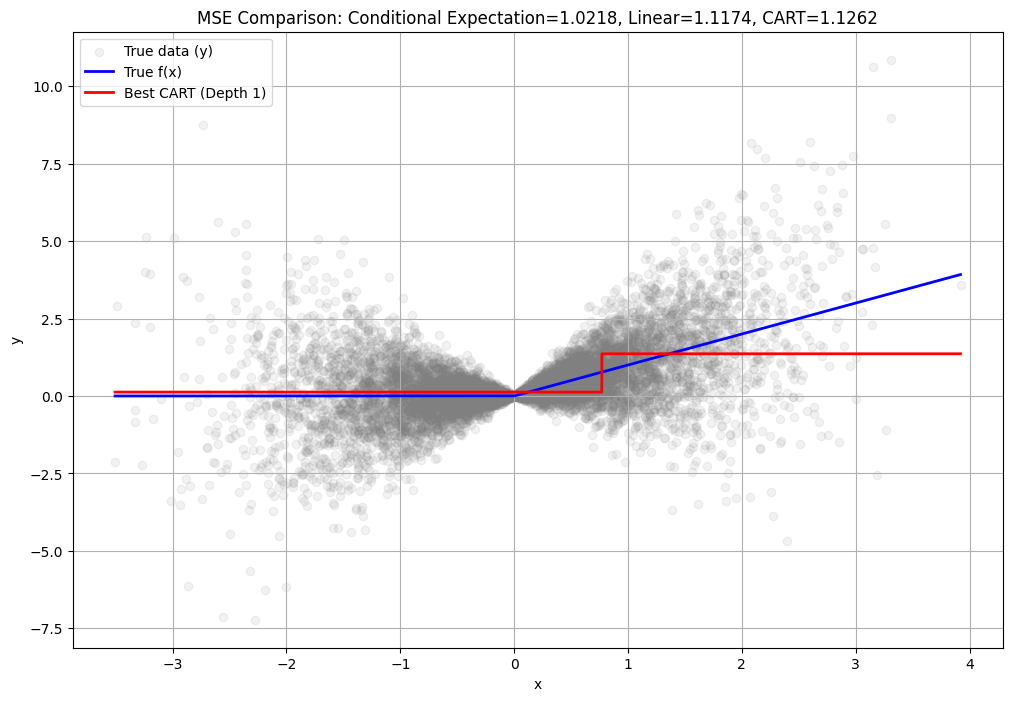

In [7]:
# Step 7: Plot results
plt.figure(figsize=(12, 8))

# True function f(x)
plt.scatter(x, y, alpha=0.1, label='True data (y)', color='gray')
plt.plot(np.sort(x), f(np.sort(x)), label='True f(x)', color='blue', linewidth=2)

# CART (depth 1)
plt.plot(np.sort(x), cart_model.predict(np.sort(x).reshape(-1, 1)), label='Best CART (Depth 1)', color='red', linewidth=2)

plt.title(f'MSE Comparison: Conditional Expectation={mse_conditional_expectation:.4f}, '
          f'Linear={mse_linear:.4f}, CART={mse_cart:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()





In [8]:
# Print MSEs
print(f"Mean Squared Error (Conditional Expectation): {mse_conditional_expectation:.4f}")
print(f"Mean Squared Error (Best Linear Predictor): {mse_linear:.4f}")
print(f"Mean Squared Error (Best CART Depth 1): {mse_cart:.4f}")

# Extract the values of the split (x0) and the predicted values (a and b)
tree = cart_model.tree_

# The tree will have a "split" node, and we can extract that point
x0 = tree.threshold[0]  # This is the splitting point

# The predicted values (a and b) are stored in the "value" attribute
# First value is for the left node (x <= x0) and second is for right node (x > x0)
a = tree.value[tree.children_left[0]][0][0]  # Left node prediction (x <= x0)
b = tree.value[tree.children_right[0]][0][0]  # Right node prediction (x > x0)

# Print the results
print(f"x0 (splitting point): {x0:.4f}")
print(f"a (prediction for x <= x0): {a:.4f}")
print(f"b (prediction for x > x0): {b:.4f}")

Mean Squared Error (Conditional Expectation): 1.0218
Mean Squared Error (Best Linear Predictor): 1.1174
Mean Squared Error (Best CART Depth 1): 1.1262
x0 (splitting point): 0.7699
a (prediction for x <= x0): 0.1254
b (prediction for x > x0): 1.3621
